In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Text(0, 0.5, 'Price')

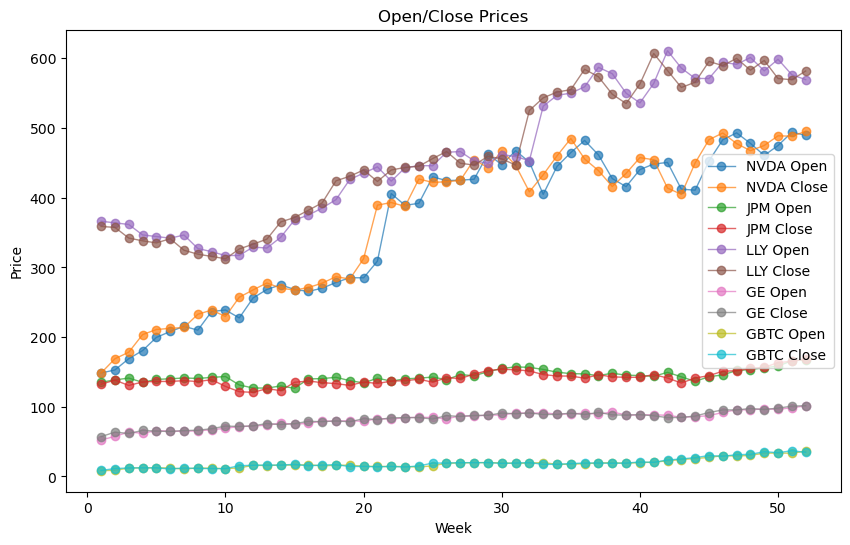

In [2]:
open_close = pd.read_csv('data/open_close.csv')

columns = ['NVDA Open', 'NVDA Close', 'JPM Open', 'JPM Close', 'LLY Open', 'LLY Close',
           'GE Open', 'GE Close', 'GBTC Open', 'GBTC Close']

open_close.drop(0, inplace=True)
open_close = open_close.astype(float)
open_close.columns = columns

open_close.plot(style='-o', linewidth=1, alpha=0.7, figsize=(10, 6))
plt.title('Open/Close Prices')
plt.xlabel('Week')
plt.ylabel('Price')

Text(0, 0.5, 'Return')

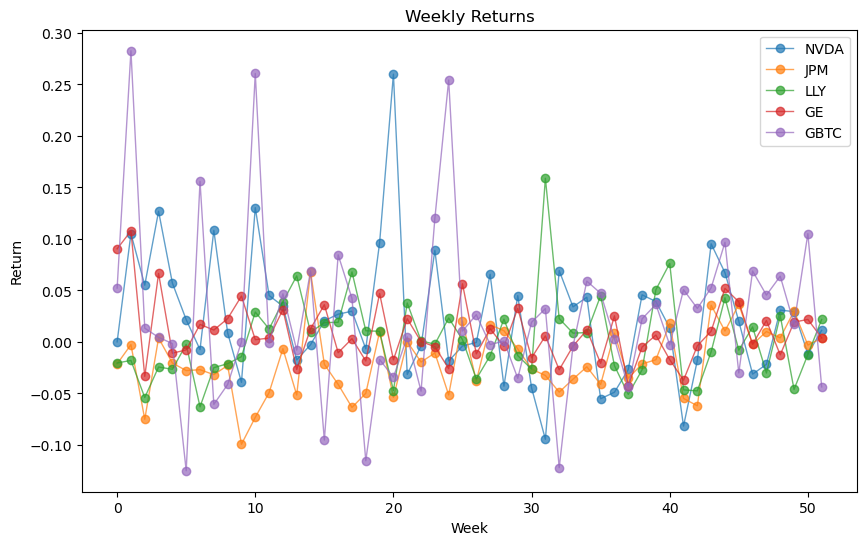

In [3]:
weekly_returns = pd.read_csv('data/weekly_returns.csv')

weekly_returns.plot(style='-o', linewidth=1, alpha=0.7, figsize=(10, 6))
plt.title('Weekly Returns')
plt.xlabel('Week')
plt.ylabel('Return')

In [4]:
mu_vec = pd.read_csv('data/mu_vec.csv', index_col=0)
covariance_mtx = pd.read_csv('data/covariance_mtx.csv', index_col=0)

mu_vec, covariance_mtx

(             0
 NVDA  0.023389
 JPM  -0.018947
 LLY   0.002577
 GE    0.009198
 GBTC  0.025939,
           NVDA       JPM       LLY        GE      GBTC
 NVDA  0.003706  0.000040 -0.000509  0.000338  0.000289
 JPM   0.000040  0.001054  0.000035  0.000385 -0.000017
 LLY  -0.000509  0.000035  0.001574 -0.000061  0.000119
 GE    0.000338  0.000385 -0.000061  0.000931  0.000537
 GBTC  0.000289 -0.000017  0.000119  0.000537  0.006881)

Text(0.5, 0, 'Stock')

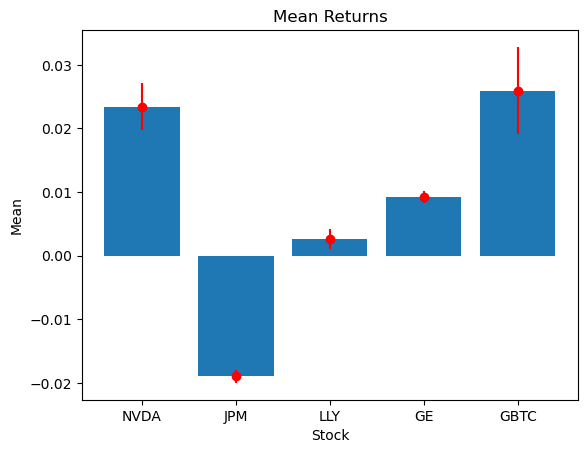

In [5]:
plt.bar(mu_vec.index, mu_vec.values.flatten())
plt.errorbar(mu_vec.index, mu_vec.values.flatten(), yerr=np.diagonal(covariance_mtx), fmt="o", color="r")
plt.title('Mean Returns')
plt.ylabel('Mean')
plt.xlabel('Stock')

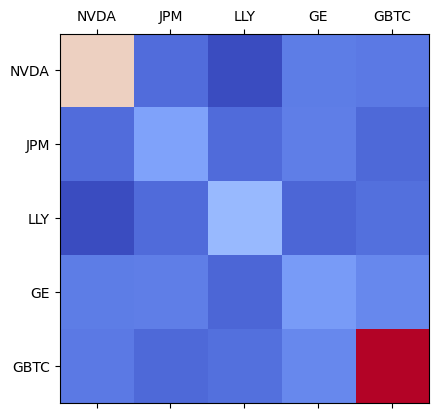

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.matshow(covariance_mtx, cmap='coolwarm')

labels = list(covariance_mtx.columns)
x_ticks = list(range(len(labels)))
ax.set_xticks(x_ticks)
ax.set_yticks(x_ticks)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

plt.show()